In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Saleschanel.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


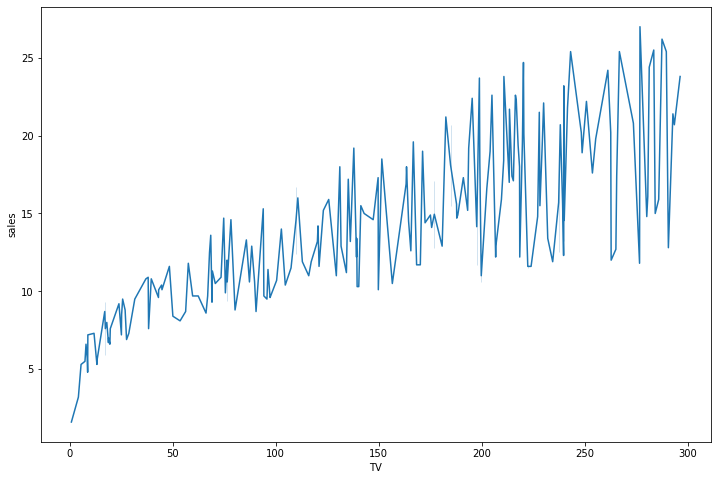

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (12,8))
sns.lineplot(x='TV',y='sales',data=df)

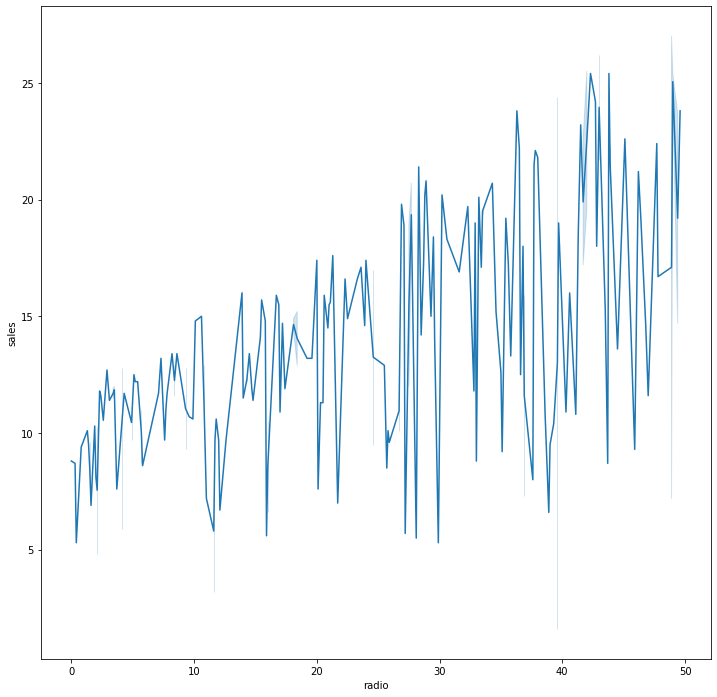

In [11]:
fig = plt.figure(figsize = (12,12))
sns.lineplot(x = 'radio', y = 'sales', data = df)

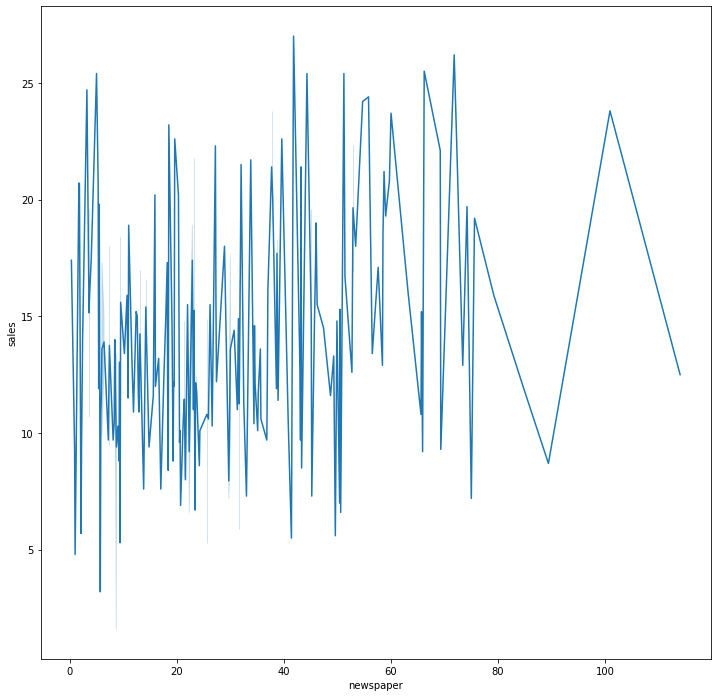

In [12]:
fig = plt.figure(figsize = (12,12))
sns.lineplot(x = 'newspaper', y = 'sales', data = df)

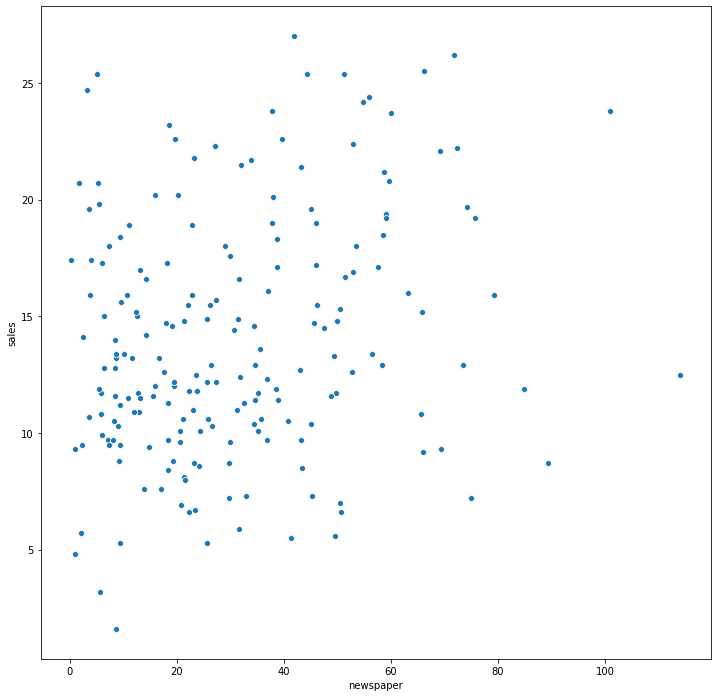

In [15]:
fig = plt.figure(figsize = (12,12))
sns.scatterplot(x = 'newspaper', y = 'sales', data = df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [17]:
df.shape

(200, 4)

In [18]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [19]:
dfcor=df.corr()
dfcor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


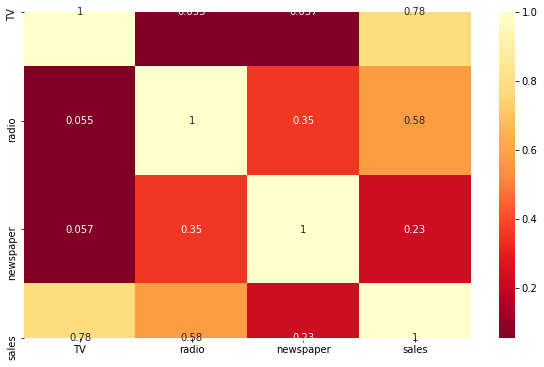

In [21]:
sns.heatmap?
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)
#strong corelation between tv and sales

In [30]:
collist=df.columns.values
ncol=4
nrows=100

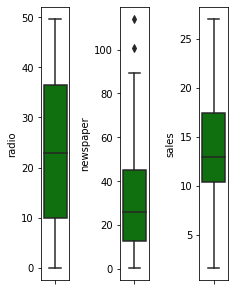

In [31]:
plt.subplot?
plt.figure(figsize=(ncol,100*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [32]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [34]:
#treating using log
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [35]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.799875
sales        0.407571
dtype: float64

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[9.69852266e-01, 9.81522472e-01, 1.27054817e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 7.84008452e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.27219508e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.07922051e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.07727442e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 1.36239293e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 5.26522686e-02, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 7.16694174e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 2.84612391e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 6.14011337e-02, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 8.52446540e-02, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.78601844e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.21484164e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.21367806e

In [37]:
threshold=3
print(np.where(z>3))

(array([33], dtype=int64), array([2], dtype=int64))


In [38]:
df_new=df[(z<3).all(axis=1)]
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,4.251348,22.1
1,44.5,39.3,3.830813,10.4
2,17.2,45.9,4.252772,9.3
3,151.5,41.3,4.085976,18.5
4,180.8,10.8,4.084294,12.9
...,...,...,...,...
195,38.2,3.7,2.694627,7.6
196,94.2,4.9,2.208274,9.7
197,177.0,9.3,2.001480,12.8
198,283.6,42.0,4.207673,25.5


In [39]:
df.shape

(200, 4)

In [40]:
df_new.shape

(199, 4)

In [41]:
df_new.skew()

TV          -0.063150
radio        0.090691
newspaper   -0.717354
sales        0.416327
dtype: float64

In [46]:
#treating using log
import numpy as np
for col in df_new.columns:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [47]:
df_new.skew()

TV          -0.063150
radio        0.090691
newspaper   -0.717354
sales        0.416327
dtype: float64

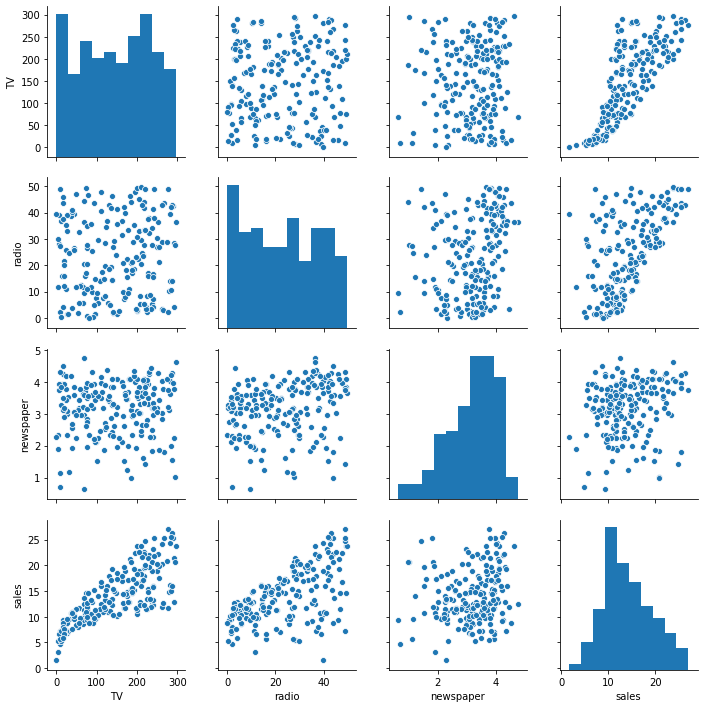

In [48]:
sns.pairplot(df_new)
plt.show()

In [49]:
#separating the input variable
import numpy as np
df_x=df_new.drop(columns=["sales"])
y=df_new['sales']

In [50]:
#sacaling down using standardscaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,TV,radio,newspaper
0,0.979090,0.978080,1.287306
1,-1.193199,1.079124,0.787741
2,-1.512722,1.523719,1.288997
3,0.059144,1.213850,1.090856
4,0.402076,-0.840714,1.088858
...,...,...,...
194,-1.266935,-1.318990,-0.561964
195,-0.611503,-1.238155,-1.139716
196,0.357600,-0.941758,-1.385372
197,1.605262,1.261004,1.235424


In [51]:
x.skew()

TV          -0.063150
radio        0.090691
newspaper   -0.717354
dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 55,test_size=0.20)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
def maxr2_score(regr,x,y):
    max_r_score=-10
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr=linear_model.LinearRegression()
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ", final_r_state,"is",max_r_score)
    return final_r_state

In [54]:
from sklearn.linear_model import LinearRegression
lrreg=LinearRegression()
r_state=maxr2_score(lrreg,x,y)

r2_score corresponding to random state:  42 is:  0.8677924272802668
r2_score corresponding to random state:  43 is:  0.9048262770819535
r2_score corresponding to random state:  44 is:  0.8576669494009769
r2_score corresponding to random state:  45 is:  0.789384476609376
r2_score corresponding to random state:  46 is:  0.870755370797444
r2_score corresponding to random state:  47 is:  0.8935441424318221
r2_score corresponding to random state:  48 is:  0.8637716294719932
r2_score corresponding to random state:  49 is:  0.8130088614289
r2_score corresponding to random state:  50 is:  0.8464090280108075
r2_score corresponding to random state:  51 is:  0.9073797001301337
r2_score corresponding to random state:  52 is:  0.9024139483388712
r2_score corresponding to random state:  53 is:  0.8843777037202283
r2_score corresponding to random state:  54 is:  0.836900297812206
r2_score corresponding to random state:  55 is:  0.8302981595828365
r2_score corresponding to random state:  56 is:  0.879

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 6}

In [56]:
#knn max r2 score
knr=KNeighborsRegressor(n_neighbors=6)
r_state=maxr2_score(knr,x,y)

r2_score corresponding to random state:  42 is:  0.8677924272802668
r2_score corresponding to random state:  43 is:  0.9048262770819535
r2_score corresponding to random state:  44 is:  0.8576669494009769
r2_score corresponding to random state:  45 is:  0.789384476609376
r2_score corresponding to random state:  46 is:  0.870755370797444
r2_score corresponding to random state:  47 is:  0.8935441424318221
r2_score corresponding to random state:  48 is:  0.8637716294719932
r2_score corresponding to random state:  49 is:  0.8130088614289
r2_score corresponding to random state:  50 is:  0.8464090280108075
r2_score corresponding to random state:  51 is:  0.9073797001301337
r2_score corresponding to random state:  52 is:  0.9024139483388712
r2_score corresponding to random state:  53 is:  0.8843777037202283
r2_score corresponding to random state:  54 is:  0.836900297812206
r2_score corresponding to random state:  55 is:  0.8302981595828365
r2_score corresponding to random state:  56 is:  0.879

In [57]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lrreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression:",cross_val_score(lrreg,x,y,cv=5,scoring='r2').std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").std())
# based on output KNN Regression is Performing well

Mean r2 score for Linear Regression: 0.8872005567864957
standard deviation in r2 score for Linear Regression: 0.039149558569899545

Mean r2 score for KNN Regression:  0.9283553854610529
standard deviation in r2 score for KNN Regression: 0.03580441366271584


In [58]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.1}

In [59]:
lsreg=Lasso(alpha=0.1)
r_state=maxr2_score(lsreg,x,y)

r2_score corresponding to random state:  42 is:  0.8677924272802668
r2_score corresponding to random state:  43 is:  0.9048262770819535
r2_score corresponding to random state:  44 is:  0.8576669494009769
r2_score corresponding to random state:  45 is:  0.789384476609376
r2_score corresponding to random state:  46 is:  0.870755370797444
r2_score corresponding to random state:  47 is:  0.8935441424318221
r2_score corresponding to random state:  48 is:  0.8637716294719932
r2_score corresponding to random state:  49 is:  0.8130088614289
r2_score corresponding to random state:  50 is:  0.8464090280108075
r2_score corresponding to random state:  51 is:  0.9073797001301337
r2_score corresponding to random state:  52 is:  0.9024139483388712
r2_score corresponding to random state:  53 is:  0.8843777037202283
r2_score corresponding to random state:  54 is:  0.836900297812206
r2_score corresponding to random state:  55 is:  0.8302981595828365
r2_score corresponding to random state:  56 is:  0.879

In [60]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())
# based on output Lasso Regression is Performing as linear Regression

Mean r2 score for Lasso Regression: 0.8882986287181431
standard deviation in r2 score for Lasso Regression: 0.03912864128028492


In [61]:
# gradient Boosting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [62]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Gradientboosting Regressor:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for GradientbootingRegressir:",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Gradientboosting Regressor: 0.9770462935982346
standard deviation in r2 score for GradientbootingRegressir: 0.008907113705509784


In [63]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lrreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)            
clf.best_params_

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 1000}

In [65]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Adaboosting Regressor:",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for AdabootingRegressir:",cross_val_score(ada_reg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Adaboosting Regressor: 0.9552184006936126
standard deviation in r2 score for AdabootingRegressir: 0.010198513407993161


In [69]:
#worked on all models gradient boosting worked well  after boosting and crossvalidation gradient boosting regressor boosting mean r2 value
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,test_size=20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [70]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('RMSE is',np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is:",r2_score(y_test,y_pred))
#we got maximum r2 score

RMSE is 0.5949107735319145
r2 score is: 0.987101848486148


In [71]:
from sklearn.externals import joblib
joblib.dump(lrreg,'project6_gbr.pkl')

['project6_gbr.pkl']